In [3]:
import pandas as pd

# Load the data
f1_data = pd.read_csv('formula1_2020season_raceResults.csv')

# Display the first few rows of the dataframe
f1_data.head()

,Track,Position,No,Driver,Team,Starting Grid,Laps,Total Time/Gap/Retirement,Points,Fastest Lap
0,Austria,1,77,Valtteri Bottas,Mercedes,1,71,1:30:55.739,25,No
1,Austria,2,16,Charles Leclerc,Ferrari,7,71,+2.700,18,No
2,Austria,3,4,Lando Norris,McLaren Renault,3,71,+5.491,16,Yes
3,Austria,4,44,Lewis Hamilton,Mercedes,5,71,+5.689,12,No
4,Austria,5,55,Carlos Sainz,McLaren Renault,8,71,+8.903,10,No


In [7]:
def convert_to_seconds(time_str):
    if 'Retired' in time_str or ':' not in time_str:
        return np.nan
    else:
        time_parts = time_str.split(':')
        if len(time_parts) == 3:
            # Format is 'hh:mm:ss.sss'
            hours, minutes, seconds = time_parts
            return int(hours) * 3600 + int(minutes) * 60 + float(seconds)
        else:
            # Format is 'mm:ss'
            minutes, seconds = time_parts
            return int(minutes) * 60 + int(seconds)

# Convert 'Total Time/Gap/Retirement' to seconds for easier analysis
f1_data['Total Time (s)'] = f1_data['Total Time/Gap/Retirement'].apply(convert_to_seconds)

# Calculate summary statistics
summary_stats = f1_data[['Laps', 'Points', 'Total Time (s)']].describe()
summary_stats

,Laps,Points,Total Time (s)
count,340.000000,340.000000,17.000000
mean,54.117647,5.100000,5994.539824
std,18.846006,7.257302,1471.979524
min,0.000000,0.000000,4781.993000
25%,52.000000,0.000000,5312.430000
50%,57.000000,0.500000,5505.279000
75%,65.000000,8.500000,5788.645000
max,87.000000,26.000000,10787.515000


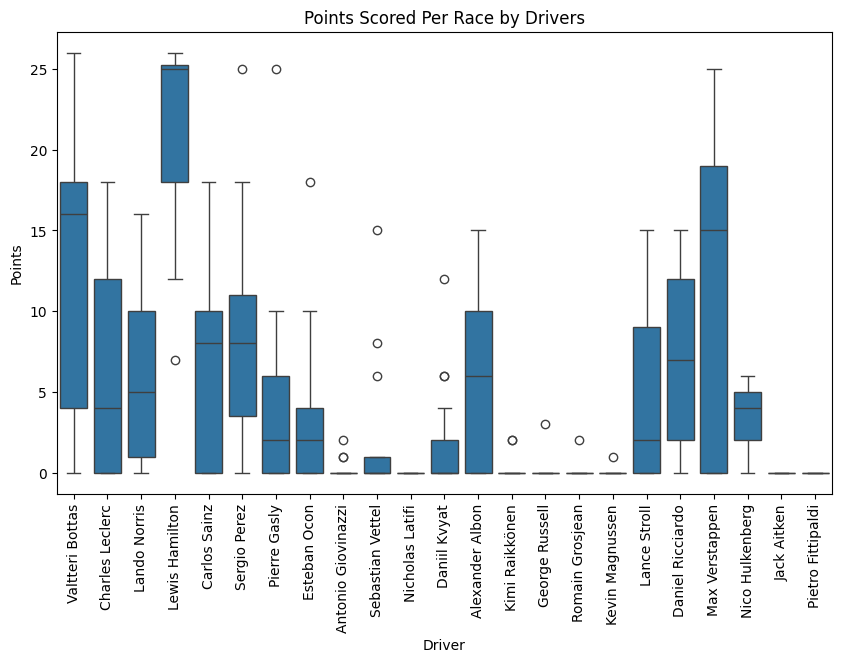

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.title('Points Scored Per Race by Drivers')
sns.boxplot(x='Driver', y='Points', data=f1_data)
plt.xticks(rotation=90)
plt.show()

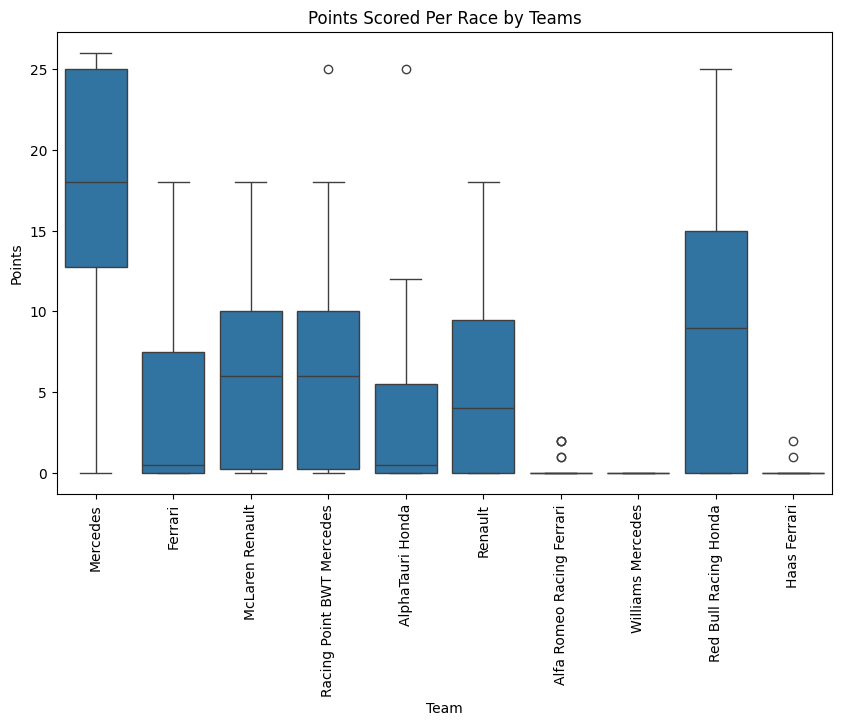

In [10]:
plt.figure(figsize=(10, 6))
plt.title('Points Scored Per Race by Teams')
sns.boxplot(x='Team', y='Points', data=f1_data)
plt.xticks(rotation=90)
plt.show()

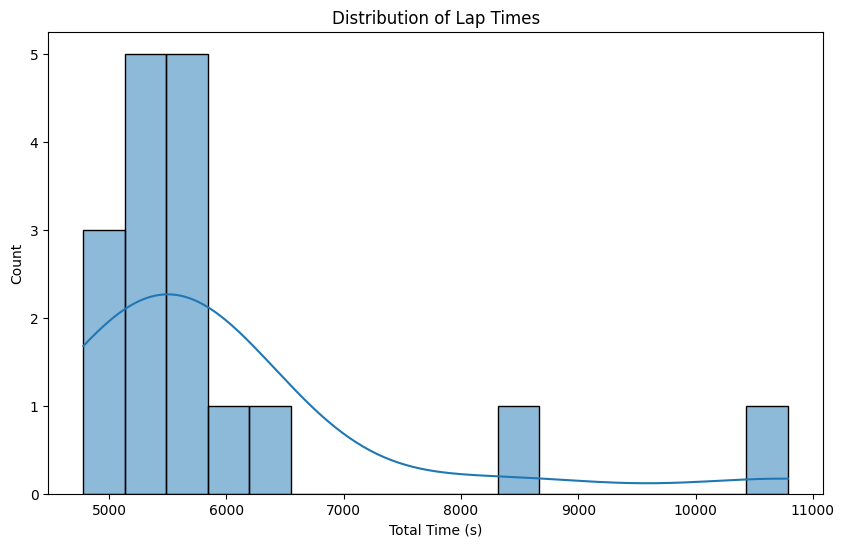

In [11]:
plt.figure(figsize=(10, 6))
plt.title('Distribution of Lap Times')
sns.histplot(f1_data['Total Time (s)'].dropna(), kde=True)
plt.xlabel('Total Time (s)')
plt.show()

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import numpy as np

# Define the independent variables
X = f1_data[['Starting Grid', 'Laps']]

# Define the dependent variable
y = f1_data['Points']

# Split the data into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Linear Regression model
model = LinearRegression()

# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
predictions = model.predict(X_test)

# Calculate the mean absolute error of the predictions
mae = metrics.mean_absolute_error(y_test, predictions)
mae

3.6067503027343775

In [15]:
driver_avg_points = f1_data.groupby('Driver')['Points'].mean().reset_index()
driver_avg_points.columns = ['Driver', 'Average Points']
driver_avg_points.head()

,Driver,Average Points
0,Alexander Albon,6.176471
1,Antonio Giovinazzi,0.235294
2,Carlos Sainz,6.176471
3,Charles Leclerc,5.764706
4,Daniel Ricciardo,7.000000


In [16]:
driver_podiums = f1_data[f1_data['Position'].isin(['1', '2', '3'])].groupby('Driver').size().reset_index()
driver_podiums.columns = ['Driver', 'Podiums']
driver_podiums.head()

,Driver,Podiums
0,Alexander Albon,2
1,Carlos Sainz,1
2,Charles Leclerc,2
3,Daniel Ricciardo,2
4,Esteban Ocon,1


In [17]:
unique_values = f1_data['Total Time/Gap/Retirement'].unique()
unique_values

array(['1:30:55.739', '+2.700', '+5.491', '+5.689', '+8.903', '+15.092',
       '+16.682', '+17.456', '+21.146', '+24.545', '+31.650', 'DNF',
       '1:22:50.683', '+13.719', '+33.698', '+44.400', '+61.470',
       '+62.387', '+62.453', '+62.591', '+1 lap', '+2 laps',
       '1:36:12.473', '+8.702', '+9.452', '+57.579', '+78.316', '+5 laps',
       '1:28:01.283', '+5.856', '+18.474', '+19.650', '+22.277',
       '+26.937', '+31.188', '+32.670', '+37.311', '+41.857', '+42.167',
       '+52.004', '+53.370', '+54.205', '+54.549', '+55.050', 'DNS',
       '1:19:41.993', '+11.326', '+19.231', '+29.289', '+39.146',
       '+42.538', '+55.951', '+64.773', '+65.544', '+69.669', '+70.642',
       '+73.370', '+74.070', '1:31:45.279', '+24.177', '+44.752',
       '1:24:08.761', '+8.448', '+15.455', '+18.877', '+40.650',
       '+42.712', '+43.774', '+47.371', '+52.603', '+53.179', '+70.200',
       '+71.504', '+72.894', '+74.920', '+76.793', '+77.795', '+85.540',
       '1:47:06.056', '+0.415', '

In [19]:
def convert_to_seconds(time_str):
    try:
        h, m, s = map(float, time_str.split(':'))
        return h * 3600 + m * 60 + s
    except ValueError:
        return np.nan

f1_data['Total Time (s)'] = f1_data['Total Time/Gap/Retirement'].apply(convert_to_seconds)
f1_data['Average Lap Time (s)'] = f1_data['Total Time (s)'] / f1_data['Laps']

driver_avg_lap_time = f1_data.groupby('Driver')['Average Lap Time (s)'].mean().reset_index()
driver_avg_lap_time.columns = ['Driver', 'Average Lap Time']
driver_avg_lap_time.head()

,Driver,Average Lap Time
0,Alexander Albon,NaN
1,Antonio Giovinazzi,NaN
2,Carlos Sainz,NaN
3,Charles Leclerc,NaN
4,Daniel Ricciardo,NaN


In [20]:
driver_avg_lap_time = driver_avg_lap_time.dropna()
driver_avg_lap_time.head()

,Driver,Average Lap Time
13,Lewis Hamilton,104.651940
14,Max Verstappen,98.604747
17,Pierre Gasly,121.246340
21,Sergio Perez,62.932345
22,Valtteri Bottas,91.631678


In [21]:
driver_data = pd.merge(driver_avg_points, driver_podiums, on='Driver', how='outer')
driver_data = pd.merge(driver_data, driver_avg_lap_time, on='Driver', how='outer')
driver_data = driver_data.fillna(0)
driver_data.head()

,Driver,Average Points,Podiums,Average Lap Time
0,Alexander Albon,6.176471,2.0,0.0
1,Antonio Giovinazzi,0.235294,0.0,0.0
2,Carlos Sainz,6.176471,1.0,0.0
3,Charles Leclerc,5.764706,2.0,0.0
4,Daniel Ricciardo,7.000000,2.0,0.0


/Users/vamsitinku/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/vamsitinku/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/vamsitinku/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/vamsitinku/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init

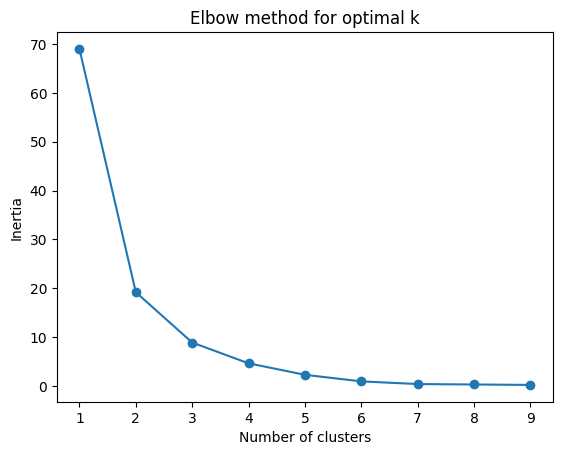

In [22]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Standardize the features
scaler = StandardScaler()
driver_data_scaled = scaler.fit_transform(driver_data[['Average Points', 'Podiums', 'Average Lap Time']])

# Determine the optimal number of clusters using the Elbow method
inertia = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=0).fit(driver_data_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 10), inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow method for optimal k')
plt.show()

In [23]:
kmeans = KMeans(n_clusters=3, random_state=0).fit(driver_data_scaled)
driver_data['Cluster'] = kmeans.labels_
driver_data.head()

/Users/vamsitinku/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,Driver,Average Points,Podiums,Average Lap Time,Cluster
0,Alexander Albon,6.176471,2.0,0.0,0
1,Antonio Giovinazzi,0.235294,0.0,0.0,0
2,Carlos Sainz,6.176471,1.0,0.0,0
3,Charles Leclerc,5.764706,2.0,0.0,0
4,Daniel Ricciardo,7.000000,2.0,0.0,0


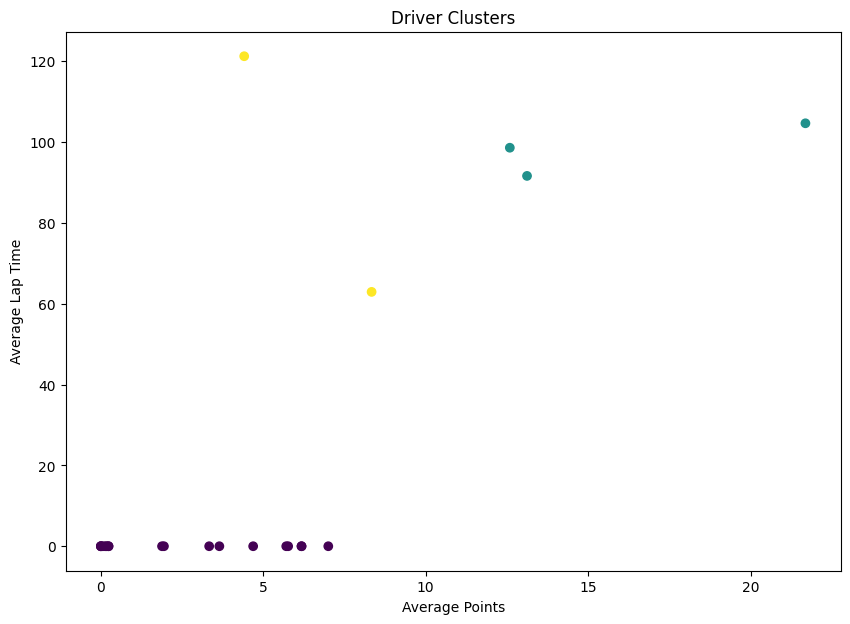

In [24]:
plt.figure(figsize=(10, 7))
plt.scatter(driver_data['Average Points'], driver_data['Average Lap Time'], c=driver_data['Cluster'])
plt.xlabel('Average Points')
plt.ylabel('Average Lap Time')
plt.title('Driver Clusters')
plt.show()

In [36]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.preprocessing import LabelEncoder

# Load the data
f1_data = pd.read_csv('formula1_2020season_raceResults.csv')

# Preprocess the data
f1_data_preprocessed = f1_data.copy()
f1_data_preprocessed['Position'] = pd.to_numeric(f1_data_preprocessed['Position'], errors='coerce')
conditions = [
    (f1_data_preprocessed['Position'] <= 3),
    (f1_data_preprocessed['Position'] <= 10) & (f1_data_preprocessed['Position'] > 3),
    (f1_data_preprocessed['Position'] > 10),
    (f1_data_preprocessed['Position'].isna())
]
choices = ['top_3', 'points_scoring', 'non_points_scoring', 'DNF']
f1_data_preprocessed['race_finish_position_category'] = np.select(conditions, choices, default='DNF')
le = LabelEncoder()
f1_data_preprocessed['Driver'] = le.fit_transform(f1_data_preprocessed['Driver'])
f1_data_preprocessed['Team'] = le.fit_transform(f1_data_preprocessed['Team'])
f1_data_preprocessed['race_finish_position_category'] = le.fit_transform(f1_data_preprocessed['race_finish_position_category'])

# Define the features and the target
X = f1_data_preprocessed[['Driver', 'Team', 'Starting Grid']]
y = f1_data_preprocessed['race_finish_position_category']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the training and testing sets
print('Training set:', X_train.shape, y_train.shape)
print('Testing set:', X_test.shape, y_test.shape)

Training set: (272, 3) (272,)
Testing set: (68, 3) (68,)


In [37]:
# Create a Logistic Regression model
lr = LogisticRegression(random_state=42)

# Train the model
lr.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = lr.predict(X_test)

# Calculate the evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

# Print the evaluation metrics
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)

Accuracy: 0.6470588235294118
Precision: 0.5311931982824478
Recall: 0.6470588235294118


/Users/vamsitinku/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/vamsitinku/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [38]:
# Create a Decision Tree model
dt = DecisionTreeClassifier(random_state=42)

# Train the model
dt.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = dt.predict(X_test)

# Calculate the evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

# Print the evaluation metrics
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)

Accuracy: 0.45588235294117646
Precision: 0.4606560003464028
Recall: 0.45588235294117646


In [39]:
# Create a Random Forest model
rf = RandomForestClassifier(random_state=42)

# Train the model
rf.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = rf.predict(X_test)

# Calculate the evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

# Print the evaluation metrics
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)

Accuracy: 0.47058823529411764
Precision: 0.4240272195834856
Recall: 0.47058823529411764


/var/folders/tv/3rwq6fyj1zv9f7jm6g4k85_m0000gn/T/ipykernel_37730/3288504005.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_drivers_points.index, y=top_10_drivers_points.values, palette='viridis')


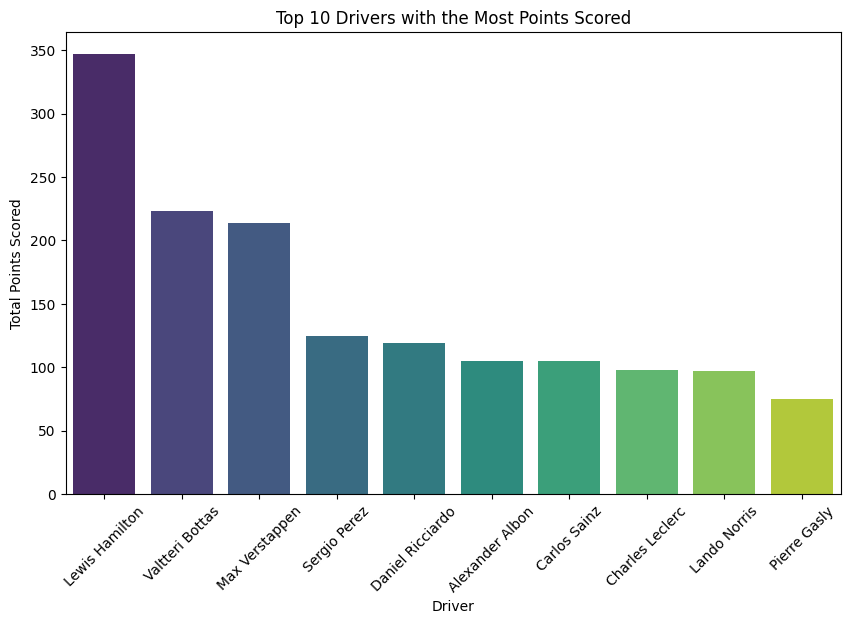

In [40]:
# Calculate the total points scored by each driver
points_scored = f1_data.groupby('Driver')['Points'].sum().sort_values(ascending=False)

# Get the top 10 drivers with the most points scored
top_10_drivers_points = points_scored.head(10)

# Create a bar plot for the top 10 drivers with the most points scored
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_drivers_points.index, y=top_10_drivers_points.values, palette='viridis')
plt.title('Top 10 Drivers with the Most Points Scored')
plt.xlabel('Driver')
plt.ylabel('Total Points Scored')
plt.xticks(rotation=45)
plt.show()

/var/folders/tv/3rwq6fyj1zv9f7jm6g4k85_m0000gn/T/ipykernel_37730/3531529116.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=teams_points.index, y=teams_points.values, palette='viridis')


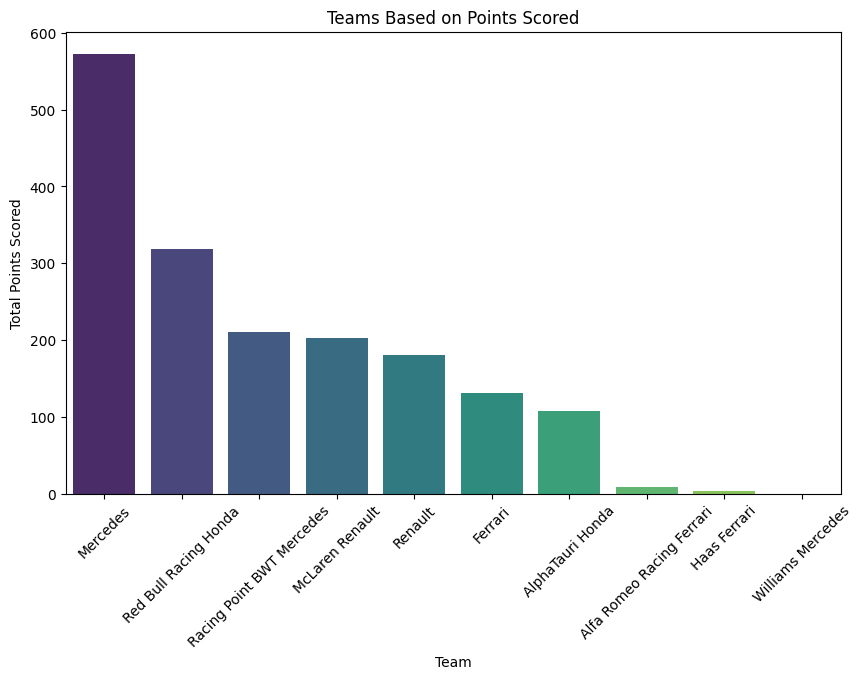

In [41]:
# Calculate the total points scored by each team
teams_points = f1_data.groupby('Team')['Points'].sum().sort_values(ascending=False)

# Create a bar plot for the teams with the points scored
plt.figure(figsize=(10, 6))
sns.barplot(x=teams_points.index, y=teams_points.values, palette='viridis')
plt.title('Teams Based on Points Scored')
plt.xlabel('Team')
plt.ylabel('Total Points Scored')
plt.xticks(rotation=45)
plt.show()

In [44]:
# Update the function to handle 'DNS'
def time_to_seconds(time_str):
    if 'Retirement' in time_str or '+' in time_str or 'DNF' in time_str or 'DNS' in time_str:
        return np.nan
    else:
        time_parts = time_str.split(':')
        return int(time_parts[0]) * 3600 + int(time_parts[1]) * 60 + float(time_parts[2])

# Apply the updated function to the 'Total Time/Gap/Retirement' column
f1_data['Total Time (s)'] = f1_data['Total Time/Gap/Retirement'].apply(time_to_seconds)

# Display the first few rows of the dataframe
f1_data.head()

,Track,Position,No,Driver,Team,Starting Grid,Laps,Total Time/Gap/Retirement,Points,Fastest Lap,Total Time (s)
0,Austria,1,77,Valtteri Bottas,Mercedes,1,71,1:30:55.739,25,No,5455.739
1,Austria,2,16,Charles Leclerc,Ferrari,7,71,+2.700,18,No,NaN
2,Austria,3,4,Lando Norris,McLaren Renault,3,71,+5.491,16,Yes,NaN
3,Austria,4,44,Lewis Hamilton,Mercedes,5,71,+5.689,12,No,NaN
4,Austria,5,55,Carlos Sainz,McLaren Renault,8,71,+8.903,10,No,NaN


In [46]:
# Remove rows with missing values
f1_team_performance = f1_team_performance.dropna()

# Display the first few rows of the cleaned dataframe
f1_team_performance.head()

,Team,Track,Total Time (s)
26,AlphaTauri Honda,Italy,6426.056
87,Mercedes,Austria,5455.739
88,Mercedes,Bahrain,10787.515
89,Mercedes,Belgium,5048.761
90,Mercedes,Eifel,5749.641


/var/folders/tv/3rwq6fyj1zv9f7jm6g4k85_m0000gn/T/ipykernel_37730/1446210880.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  plot = sns.barplot(x='Total Time (s)', y='Team', hue='Track', data=f1_team_performance, ci=None)


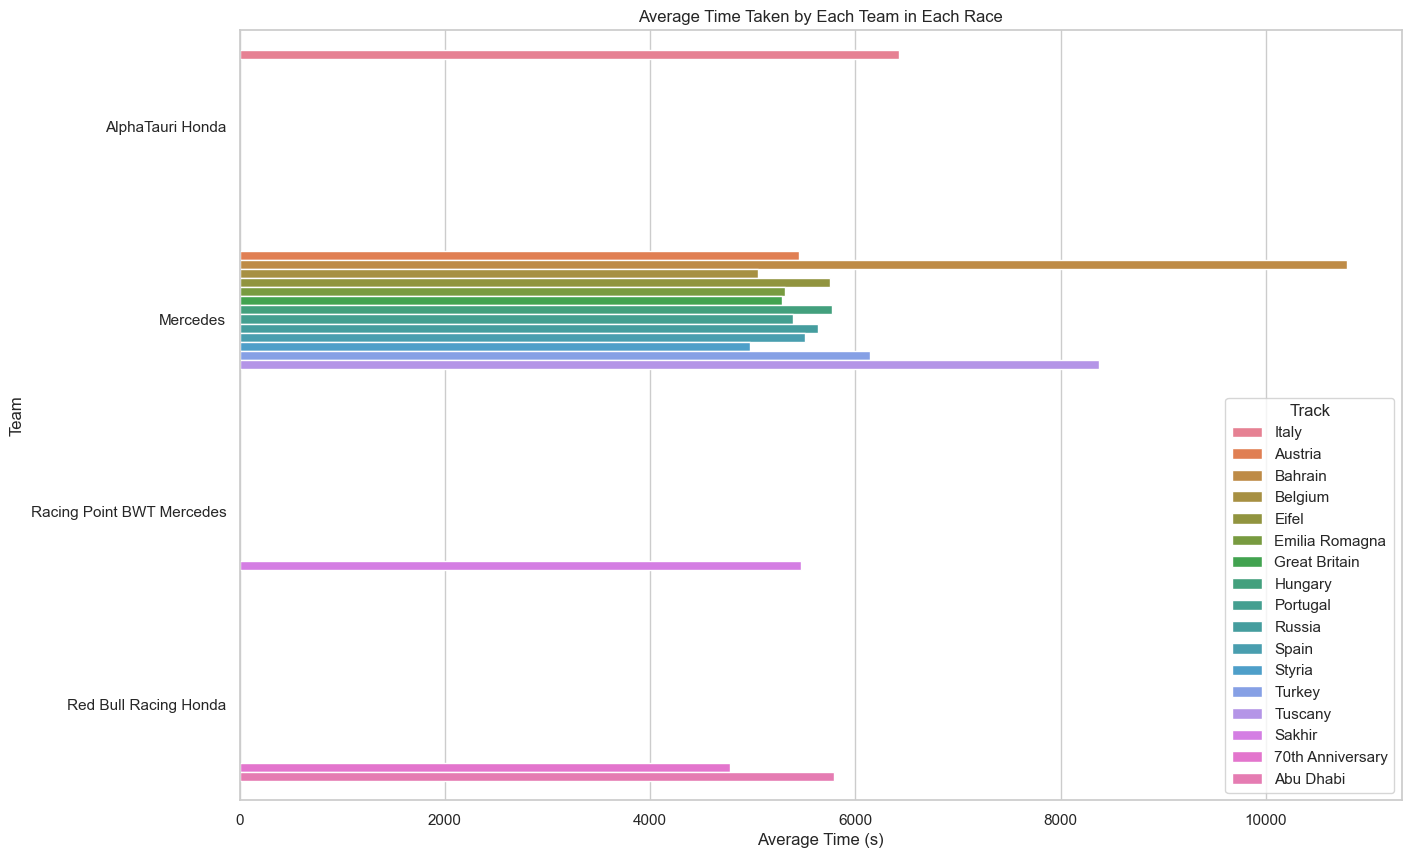

In [47]:
# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style of the plot
sns.set(style='whitegrid')

# Create a bar plot
plt.figure(figsize=(15, 10))
plot = sns.barplot(x='Total Time (s)', y='Team', hue='Track', data=f1_team_performance, ci=None)

# Set the labels and title
plot.set(xlabel='Average Time (s)', ylabel='Team', title='Average Time Taken by Each Team in Each Race')

# Show the plot
plt.show()

In [48]:
# Convert 'Starting Grid' and 'Position' columns to numeric
f1_data['Starting Grid'] = pd.to_numeric(f1_data['Starting Grid'], errors='coerce')
f1_data['Position'] = pd.to_numeric(f1_data['Position'], errors='coerce')

# Calculate the correlation between 'Starting Grid' and 'Position'
correlation = f1_data[['Starting Grid', 'Position']].corr()

# Display the correlation
print(correlation)

               Starting Grid  Position
Starting Grid       1.000000  0.746121
Position            0.746121  1.000000


In [49]:
# Group by 'Team' and 'Position' and count the number of occurrences
f1_team_position = f1_data.groupby(['Team', 'Position']).size().reset_index(name='Count')

# Display the first few rows of the grouped dataframe
f1_team_position.head()

,Team,Position,Count
0,Alfa Romeo Racing Ferrari,9.0,3
1,Alfa Romeo Racing Ferrari,10.0,2
2,Alfa Romeo Racing Ferrari,11.0,3
3,Alfa Romeo Racing Ferrari,12.0,3
4,Alfa Romeo Racing Ferrari,13.0,2


<Figure size 1500x1000 with 0 Axes>

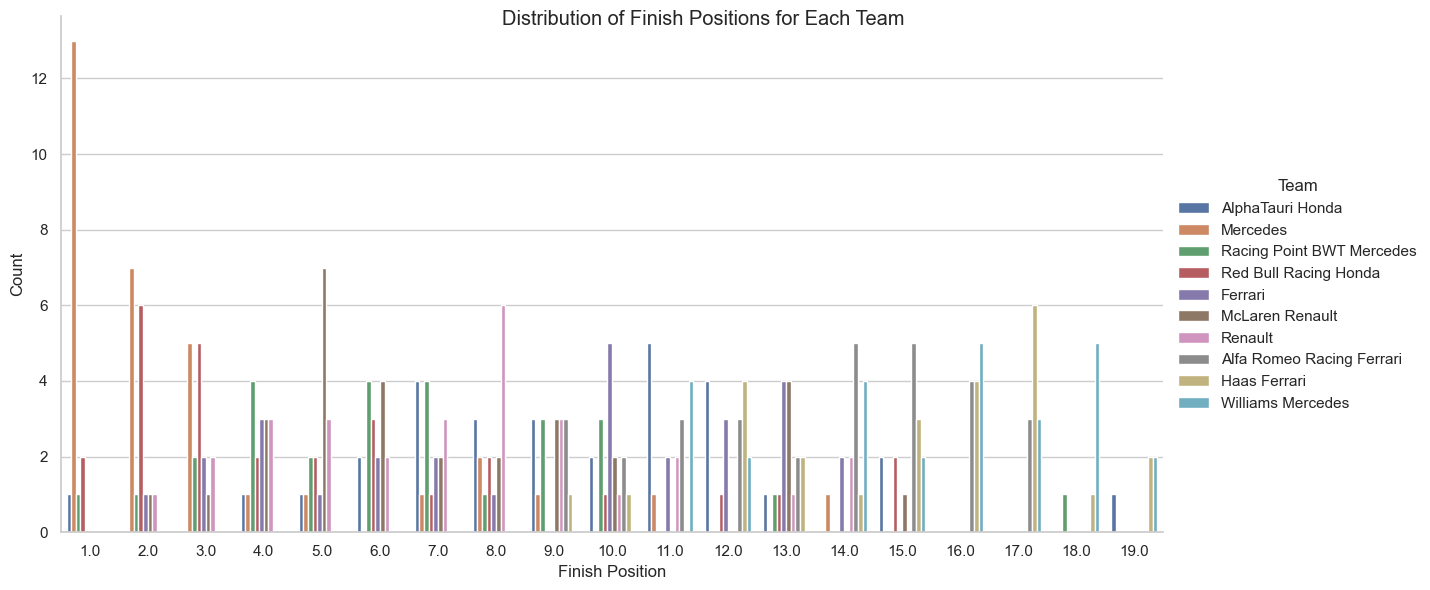

In [50]:
# Create a bar plot
plt.figure(figsize=(15, 10))
plot = sns.catplot(x='Position', y='Count', hue='Team', data=f1_team_position, kind='bar', height=6, aspect=2)

# Set the labels and title
plot.set_xlabels('Finish Position')
plot.set_ylabels('Count')
plot.fig.suptitle('Distribution of Finish Positions for Each Team')

# Show the plot
plt.show()

In [51]:
# Group by 'Team' and 'Driver' and calculate the average position
f1_driver_performance = f1_data.groupby(['Team', 'Driver'])['Position'].mean().reset_index()

# Display the first few rows of the grouped dataframe
f1_driver_performance.head()

,Team,Driver,Position
0,Alfa Romeo Racing Ferrari,Antonio Giovinazzi,13.857143
1,Alfa Romeo Racing Ferrari,Kimi Raikkönen,13.000000
2,AlphaTauri Honda,Daniil Kvyat,10.625000
3,AlphaTauri Honda,Pierre Gasly,8.285714
4,Ferrari,Charles Leclerc,7.000000


/var/folders/tv/3rwq6fyj1zv9f7jm6g4k85_m0000gn/T/ipykernel_37730/36106801.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  plot = sns.barplot(x='Position', y='Driver', hue='Team', data=f1_driver_performance, ci=None)


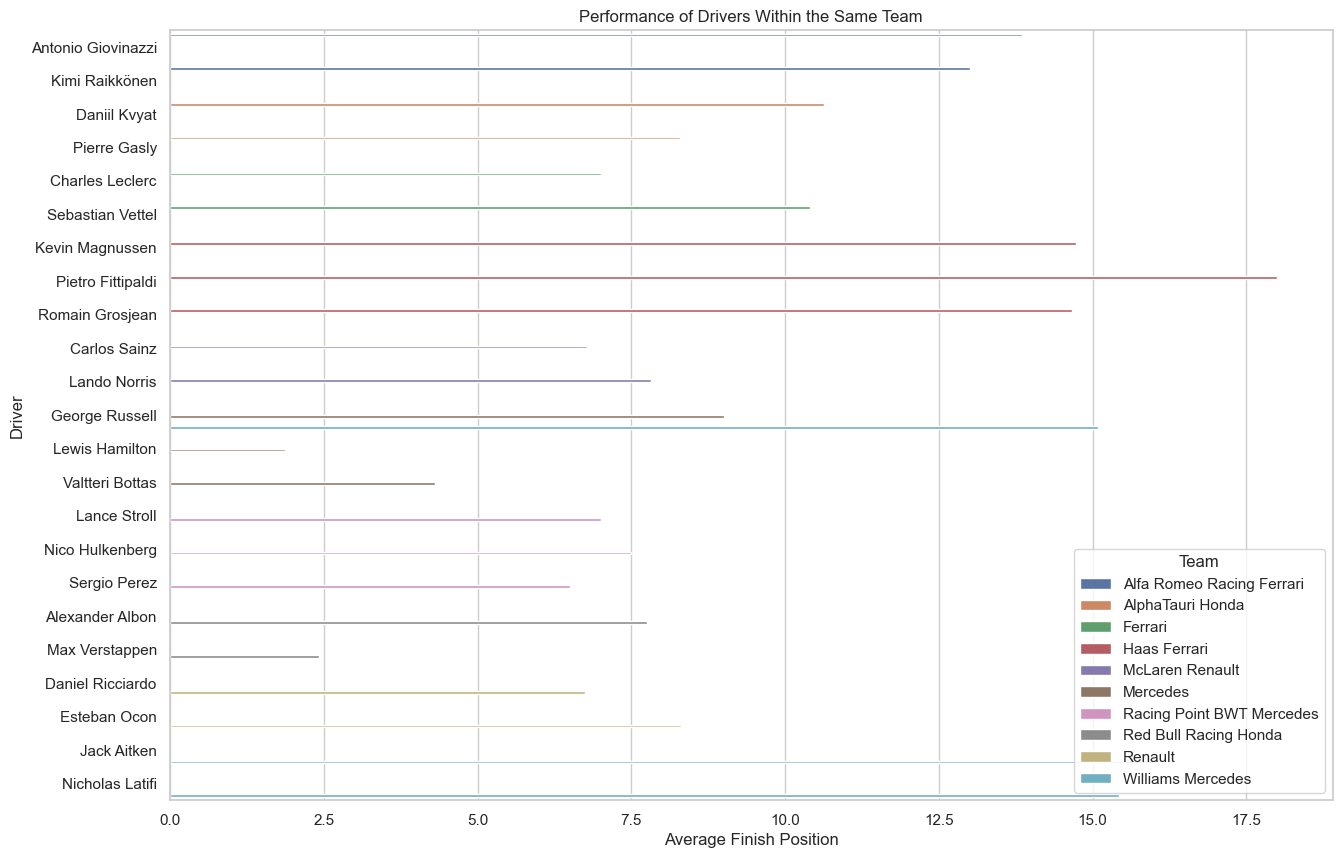

In [52]:
# Create a bar plot
plt.figure(figsize=(15, 10))
plot = sns.barplot(x='Position', y='Driver', hue='Team', data=f1_driver_performance, ci=None)

# Set the labels and title
plot.set(xlabel='Average Finish Position', ylabel='Driver', title='Performance of Drivers Within the Same Team')

# Show the plot
plt.show()